# Ordinary differential equations: solar system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from scipy import integrate
from matplotlib import animation, rc
#from IPython.display import HTML
rc('animation', html='html5')
%matplotlib nbagg

In [2]:
# -*- coding: utf-8 -*-
"""
A Solar System class
"""

import numpy as np
from scipy.integrate import odeint

class System(object):
  def __init__(self, m, p, v, nk = 10000, G = 6.67e-11):
    """
    Syteme solaire en 2D:
    
    * m: masse de chaque objet
    * p: position de chaque objet    
    * v: vitesse de chaque objet
    * G: constance de gravitation universelle
    """
    n = len(p)
    self._n = n
    self.Y = np.zeros([nk, 4 * n])
    self.Y.fill(np.NAN)
    self.Y[-1, :2 * n] = np.array(p).flatten()
    self.Y[-1, 2 * n:] = np.array(v).flatten()
    self.m  = np.array(m)
    self.nk = nk
    self.G  = G
 
  def derivative(self, y, t):
    """
    Acceleration de chaque masse !
    """      
    m, G = self.m, self.G
    n = len(m)
    p = y[:2 * n ].reshape(n ,2)
    v = y[ 2 * n:].reshape(n ,2)
    a = np.zeros_like(p) # vecteur plein de zeros dans le mm format que p
    n = len(m) # nombre de masses
    for i in range(n): # On s'intéresse à la masse i
      for j in range(n): # Les masses j agissent dessus   
        if i != j: # i ne doit pas agir sur i !
           PiPj = p[j] - p[i]
           rij = (PiPj**2).sum()**.5
           if rij != 0. :           
             a[i] += G * m[j] * PiPj / rij**3
    y2 = y.copy()
    y2[:2*n ] = v.flatten()
    y2[ 2*n:] = a.flatten()
    return y2       
    
  
  def solve(self, dt, nt):
    time = np.linspace(0., dt, nt + 1)
    Ys = odeint( self.derivative, self.Y[-1], time)
    nk = self.nk
    Y = self.Y
    Y[:nk - nt] = Y[nt:]
    Y[-nt-1:] = Ys 
    self.Y    = Y
  
  def xy(self):
    n = self._n
    p = self.Y[-1,:2 * n].reshape(n, 2)
    return p[:,0], p[:,1]
    
  def trail(self, i):
    n = self._n
    Y = self.Y
    return Y[:, 2*i], Y[:, 2*i +1 ]
          

             

<IPython.core.display.Javascript object>


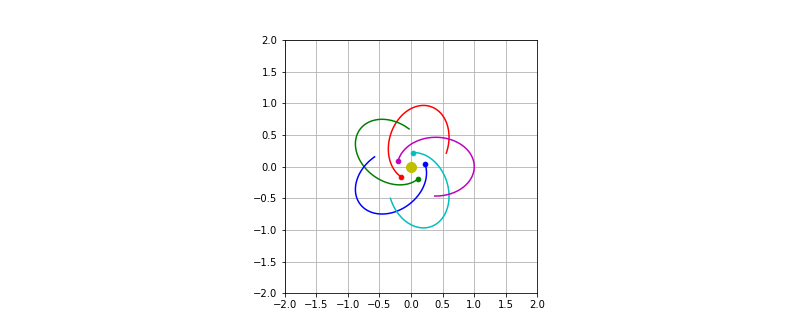

In [3]:
G = 1.

nm = 6
m = np.ones(nm)*1.e0
ms = 100. # Mass of the sun
theta = np.linspace(0., 2. * np.pi, nm)
r = np.ones(nm)
v = (G * ms / r)**.5 
v *= .6
#v[1:] *= np.random.normal(loc = 1., scale = .002, size = nm-1)
x  =   r * np.cos(theta)
y  =   r * np.sin(theta)
vx = - v * np.sin(theta)
vy =   v * np.cos(theta)
P = np.array([x,   y]).transpose()
V = np.array([vx, vy]).transpose()
colors = "yrgbcmk"
# Setting up a sun
m[0]  = ms
P[0] *= 0.
V[0] *= 0.

nm = len(m)
s = System(m, P, V, G = G, nk = 5000)      
dt = 0.005
nt = 100
s.solve(dt, nt)


from matplotlib import animation
fig = plt.figure("Le systeme solaire")
plt.clf()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
plt.xlim(-2., 2.)
plt.ylim(-2., 2.)
plt.grid()
planets = []

msize = 10. * (s.m / s.m.max())**(1./6.)
for i in range(nm):
  lc = len(colors)
  c = colors[i%lc]
  planet, = ax.plot([], [], "o"+c, markersize = msize[i])
  planets.append(planet)
  trail, = ax.plot([], [], "-"+c)
  planets.append(trail)
  
def init():
  for i in range(2 * nm):
    planets[i].set_data([], [])
    return planets 
    
def animate(i):
    s.solve(dt, nt)
    x, y = s.xy()
    for i in range(nm):
      planets[2*i].set_data(x[i:i+1], y[i:i+1])
      xt, yt = s.trail(i)
      planets[2*i+1].set_data(xt, yt)
    return planets 

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])        
"""
plt.close()
anim
"""
plt.show()